In [1]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
seed = 7
numpy.random.seed(seed)

In [3]:
# loading data from mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [5]:
X_train = X_train / 255
X_test = X_test / 255

In [6]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [9]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compilation
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [11]:
model = baseline_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=24, batch_size=200, verbose=2)
history = model.fit(X_train, y_train, nb_epoch=10, validation_split=0.2, shuffle=True)
# final performance/evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print(" Error: %.2f%%" % (100-scores[1]*100))
print(model.summary())

Train on 60000 samples, validate on 10000 samples
Epoch 1/24
 - 11s - loss: 0.2801 - acc: 0.9204 - val_loss: 0.1347 - val_acc: 0.9591
Epoch 2/24
 - 13s - loss: 0.1105 - acc: 0.9682 - val_loss: 0.0919 - val_acc: 0.9721
Epoch 3/24
 - 12s - loss: 0.0711 - acc: 0.9792 - val_loss: 0.0767 - val_acc: 0.9762
Epoch 4/24
 - 12s - loss: 0.0475 - acc: 0.9867 - val_loss: 0.0681 - val_acc: 0.9784
Epoch 5/24
 - 13s - loss: 0.0364 - acc: 0.9898 - val_loss: 0.0613 - val_acc: 0.9817
Epoch 6/24
 - 13s - loss: 0.0264 - acc: 0.9926 - val_loss: 0.0635 - val_acc: 0.9798
Epoch 7/24
 - 14s - loss: 0.0197 - acc: 0.9949 - val_loss: 0.0590 - val_acc: 0.9810
Epoch 8/24
 - 13s - loss: 0.0139 - acc: 0.9969 - val_loss: 0.0574 - val_acc: 0.9828
Epoch 9/24
 - 14s - loss: 0.0108 - acc: 0.9977 - val_loss: 0.0598 - val_acc: 0.9805
Epoch 10/24
 - 13s - loss: 0.0078 - acc: 0.9986 - val_loss: 0.0599 - val_acc: 0.9812
Epoch 11/24
 - 11s - loss: 0.0058 - acc: 0.9992 - val_loss: 0.0653 - val_acc: 0.9813
Epoch 12/24
 - 12s - los

c:\python35\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


48000/48000 [==============================] - 39s 810us/step - loss: 0.0515 - acc: 0.9845 - val_loss: 0.0241 - val_acc: 0.9912
Epoch 2/10
48000/48000 [==============================] - 41s 846us/step - loss: 0.0133 - acc: 0.9955 - val_loss: 0.0342 - val_acc: 0.9892
Epoch 3/10
48000/48000 [==============================] - 42s 872us/step - loss: 0.0159 - acc: 0.9947 - val_loss: 0.0372 - val_acc: 0.9891
Epoch 4/10
48000/48000 [==============================] - 42s 875us/step - loss: 0.0135 - acc: 0.9952 - val_loss: 0.0423 - val_acc: 0.9878
Epoch 5/10
48000/48000 [==============================] - 34s 715us/step - loss: 0.0130 - acc: 0.9957 - val_loss: 0.0471 - val_acc: 0.9872
Epoch 6/10
48000/48000 [==============================] - 33s 695us/step - loss: 0.0130 - acc: 0.9958 - val_loss: 0.0363 - val_acc: 0.9894
Epoch 7/10
48000/48000 [==============================] - 33s 696us/step - loss: 0.0096 - acc: 0.9969 - val_loss: 0.0385 - val_acc: 0.9888
Epoch 8/10
48000/48000 [==============

dict_keys(['val_loss', 'acc', 'val_acc', 'loss'])


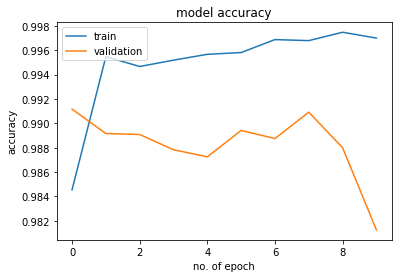

In [12]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('no. of epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

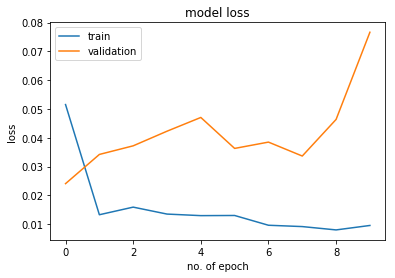

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no. of epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()